In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_excel('titanic_DataSet.xlsx')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings Mrs. John Bradley (Florence Briggs Tha...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape #taille

(1309, 12)

In [17]:
df.columns #les colones

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [18]:
df.isnull().sum() #compter le nombre des valeur nulle pour chaque variable

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [19]:
#suppression de valeur nulles dans la dataset
df.dropna(inplace=True)

In [20]:
df.isnull().sum() #compter le nombre des valeur nulle pour chaque variable

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [5]:
#supprimer les colones pour un autre dataframe
miniFrame= df.drop(['PassengerId','Name', 'Sex', 'SibSp','Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],axis=1)
miniFrame.head()

,Survived,Pclass,Age
0,0,3,22.0
1,1,1,38.0
2,1,3,26.0
3,1,1,35.0
4,0,3,35.0


In [16]:
#voir le statistique de base de diffents colonnes (nombre d'el,moyenne,variance, min, max)
miniFrame.describe()

,Survived,Pclass,Age
count,1309.000000,1309.000000,1046.000000
mean,0.377387,2.294882,29.881138
std,0.484918,0.837836,14.413493
min,0.000000,1.000000,0.170000
25%,0.000000,2.000000,21.000000
50%,0.000000,3.000000,28.000000
75%,1.000000,3.000000,39.000000
max,1.000000,3.000000,80.000000


In [15]:
miniFrame['Age'].value_counts() #compter le nombre d'individue pour chaque age

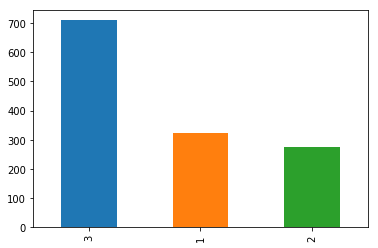

In [8]:
miniFrame['Pclass'].value_counts().plot.bar() #compter le nombre d'individue pour chaque classe avec affichage

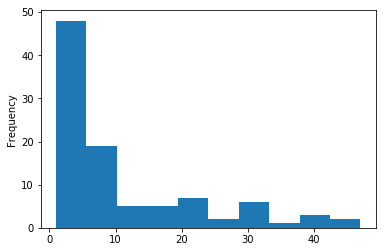

In [9]:
miniFrame['Age'].value_counts().plot.hist() #compter le nombre d'individue pour chaque age

In [10]:
df.groupby(['Sex','Pclass']).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Sex    Pclass                                                         
female 1        689.652778  0.979167  37.037594  0.555556  0.472222   
       2        632.188679  0.943396  27.499223  0.500000  0.650943   
       3        628.393519  0.666667  22.185329  0.791667  0.731481   
male   1        658.687151  0.251397  41.029272  0.340782  0.279330   
       2        695.976608  0.099415  30.815380  0.327485  0.192982   
       3        645.888438  0.095335  25.962264  0.470588  0.255578   

                     Fare  
Sex    Pclass              
female 1       109.412385  
       2        23.234827  
       3        15.324250  
male   1        69.888385  
       2        19.904946  
       3        12.415462

##### 

In [11]:
df[df['Age']<5].head() #selectionnner là ou l'age est inferieur a 5

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,Palsson Master. Gosta Leonard,male,2.0,3,1,349909,21.0750,NaN,S
10,11,1,3,Sandstrom Miss. Marguerite Rut,female,4.0,1,1,PP 9549,16.7000,G6,S
16,17,0,3,Rice Master. Eugene,male,2.0,4,1,382652,29.1250,NaN,Q
43,44,1,2,Laroche Miss. Simonne Marie Anne Andree,female,3.0,1,2,SC/Paris 2123,41.5792,NaN,C
63,64,0,3,Skoog Master. Harald,male,4.0,3,2,347088,27.9000,NaN,S


In [12]:
(df['Age']<5).head()

0    False
1    False
2    False
3    False
4    False
Name: Age, dtype: bool

In [13]:
df[df['Age']<1]['Age'].value_counts()

0.75    3
0.83    3
0.92    2
0.42    1
0.67    1
0.17    1
0.33    1
Name: Age, dtype: int64

In [14]:
df[df['Age']<18].groupby(['Sex','Pclass']).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Sex    Pclass                                                         
female 1        525.375000  0.875000  14.125000  0.500000  0.875000   
       2        619.611111  1.000000   8.273333  0.666667  1.166667   
       3        558.130435  0.652174   8.416739  1.456522  1.043478   
male   1        777.857143  0.571429   9.845714  0.571429  1.714286   
       2        673.266667  0.600000   6.222000  0.600000  0.933333   
       3        624.816667  0.166667   9.838833  1.966667  1.016667   

                     Fare  
Sex    Pclass              
female 1       104.083337  
       2        27.998844  
       3        18.284148  
male   1       129.752371  
       2        31.750280  
       3        21.677570